In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import torch.nn as nn
import torch

from torch.utils.data import DataLoader  ,TensorDataset

## 1. Create Data

In [2]:
import seaborn as sns

In [3]:
iris = sns.load_dataset("iris")

In [4]:
iris.shape

(150, 5)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2. Converting to tensor 

In [7]:
arr = iris[iris.columns[0:4]].values

#### Predictiors or Independent features

In [8]:
data = torch.tensor(arr ,dtype = torch.float )
data[:5]

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000]])

#### Labels

In [9]:
labels = torch.zeros(size = ( len(iris), )  ,dtype = torch.long)

In [10]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0])

In [11]:
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [12]:
labels[iris["species"] == "versicolor"] = 1

In [13]:
labels[iris["species"] == "virginica"]  = 2

    setosa       0
    versicolor   1
    virginica    2

In [14]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

## 3. Splitting data into Mini-Batches

In [15]:
# use scikitlearn to split the data

train_data,test_data, train_labels,test_labels = \
                              train_test_split(data, labels, train_size=.8)


# then convert them into PyTorch Datasets (note: already converted to tensors)

train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)

In [16]:
# finally, translate into dataloader objects

train_loader = DataLoader(train_data,shuffle = True, batch_size=12)
test_loader  = DataLoader(test_data,batch_size = test_data.tensors[0].shape[0])

In [17]:
train_loader.batch_size

12

In [18]:
test_loader.batch_size

30

In [19]:
# check sizes of data batches
for X,y in train_loader:
    print(X.shape,y.shape)

X,y

torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])


(tensor([[7.6000, 3.0000, 6.6000, 2.1000],
         [6.4000, 2.8000, 5.6000, 2.1000],
         [5.0000, 3.4000, 1.6000, 0.4000],
         [6.0000, 2.7000, 5.1000, 1.6000],
         [4.8000, 3.4000, 1.9000, 0.2000],
         [5.5000, 2.4000, 3.8000, 1.1000],
         [5.1000, 3.4000, 1.5000, 0.2000],
         [6.9000, 3.2000, 5.7000, 2.3000],
         [4.6000, 3.1000, 1.5000, 0.2000],
         [5.0000, 3.2000, 1.2000, 0.2000],
         [6.3000, 3.4000, 5.6000, 2.4000],
         [6.2000, 2.9000, 4.3000, 1.3000]]),
 tensor([2, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 1]))

## 4. Create ANN Model

In [20]:
def createANNirismodel(LR):

    ANNiris = nn.Sequential(
                           # Input Layer  :  4 -inputs , 64 - Neurons , 64 -outputs
                           nn.Linear(4,64),
                           nn.ReLU(),
        
                           # Hidden layer : 64 - inputs ,64 - Neurons,  64 - outputs 
                           nn.Linear(64,64),
                           nn.ReLU(),

                           # Output Layer :   64 - Inputs ,3- Neurons ,  3 -outputs
                           nn.Linear(64,3)
                           )

    # Inbuilt - LogSoftMax(nn.LogSoftmax) function and 
    #           NegativeLogLikelihoodLoss(nn.NLLLoss) implementation

    # Useful when training a classification problem with `C` classes.
    lossfunc = nn.CrossEntropyLoss()

    # Optimzer 

    optimizer = torch.optim.SGD(params = ANNiris.parameters() , lr = LR)

    return ANNiris,lossfunc,optimizer

## 5. Custom Model Train function

In [22]:
def trainTheModel(Model ,lossfunc,optimizer, train_loader,test_loader,epochs):

    # initialize accuracies as empties (not storing losses here)
    trainAcc = []
    testAcc  = []

    # loop over epochs
    for epochi in range(epochs):

        batchAcc = []
        
        # loop over training data batches
        for X,y in train_loader:

            # forward pass and loss
            yHat = Model(X)
            loss = lossfunc(yHat,y)

            # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # compute training accuracy just for this batch
            batchAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1) == y).float()).item() )
            
        # end of batch loop...

        # Average training accuracy on each Epoch 
        trainAcc.append( np.mean(batchAcc) )

        # test accuracy on each epoch
        
        # extract X,y from test dataloader
        X,y = next(iter(test_loader))
        
        predlabels = torch.argmax( Model(X),axis=1 )
        testAcc.append( 100*torch.mean((predlabels == y).float()).item() )

    # function output
    return trainAcc,testAcc


## 6. Model Training and Testing

In [23]:
# create a model
ANNiris,LossFunc,Optimizer = createANNirismodel(LR = 0.01)

# global parameter
numepochs = 500

Train_Acc,Test_Acc = trainTheModel(Model = ANNiris ,
                                  lossfunc = LossFunc,
                                  optimizer = Optimizer , 
                                  train_loader = train_loader ,
                                  test_loader = test_loader,
                                  epochs = numepochs)

## 7. Visualization

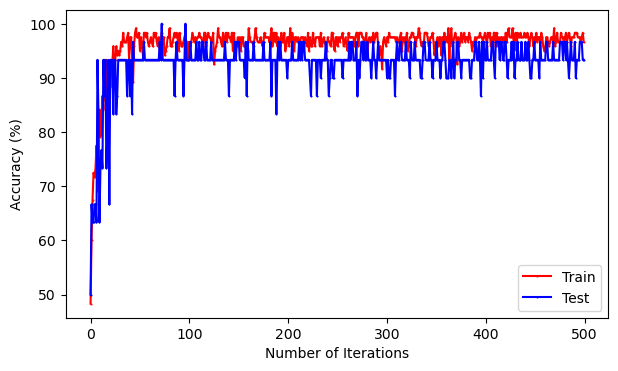

In [28]:
fig = plt.figure(figsize=(7,4))

plt.plot(Train_Acc,'ro-' , markersize = 0.5)
plt.plot(Test_Acc,'bs-' , markersize = 0.5)

plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy (%)')

plt.legend(['Train','Test'])

plt.show()